# Unsupervised Dimensionality Reduction
## Principal Component Analysis

In this notebook we will explore principal component analysis (PCA) which you could argue is just linear algebra rather than machine learning, at least in its most simple incarnation.

### PCA algorithm
Let's consider $N$ data points $\{ x_1,\cdots,x_N \}$ that live in a $p$-dimensional space $\mathbb{R}^p$. First we will zero-mean the data such that $\mu=\frac{1}{N}\sum_i x_i =0$, then we will construct a matrix $X$ whose rows are the data points and columns the dimensions
$$X=\left[x_1,x_2,\cdots, x_N \right]^T$$

Then we can form the covariance matrix $\Sigma(X)$ which is a $p \times p$ symmetric matrix
$$\Sigma(X)=\frac{1}{N-1}X^TX$$
The diagonal elements of this matrix are the variances along each of the $p$-dimensions.

#### Eigenvector decomposition
Now we are going to decompose this matrix into its component eigenvectors. Remeber the eigenvectors $v$ and eigenvalues $\lambda$ of a sqaure matrix $A$ satsify the eigenvalue equation
$$A v = \lambda v$$

Let $V$ denote the matrix whose columns are $v$, and $\Lambda$ the diagonal matrix whose elements are the eigenvalues. Then the full family of eigenvalue equations can be written as
$$A V =  V \Lambda $$
where the ordering on the right is to make sure that the columnwise eigenvectors are multiplied by there corresponding eigenvalues. Now assumming our eigenvevctors are linearly independent (which we know is true for eigenvectors from quantum mechanics) then $V^{-1}$ exists and we can write
$$ A = V \Lambda V^{-1} $$

#### Singular Value Decomposition
For rectangular matrices the equivalent of eigenvalue decomposition is singular value decompoisiton. Where our matrix $X$ is rewritten such that $X=USV^T$ where $S$ is a diagonal matrix of the singular values and $U$ & $V$ are unitary matrices whose columns are the left and right singular vectors $X$. 

Writing $X$ this way allows us to write the covariance matrix as:
$$\Sigma(X)=\frac{1}{N-1}VSU^TUSV^T$$
but since $U$ is unitary $U^TU=I$
$$\Sigma(X)=V\left(\frac{S^2}{N-1}\right)V^T$$
$$\Sigma(X) \equiv V \Lambda V^T$$
where $\Lambda$ is a diagonal matrix with eigenvalues $\lambda_i$ 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

from scipy import linalg

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.18.0


In [2]:
mnist = keras.datasets.mnist   #The original handwritten digit MNIST
#mnist = keras.datasets.fashion_mnist   #A tricky version that uses images of fashion items
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images=train_images/255.0

print("train_images.shape: ",np.shape(train_images))
X=np.reshape(train_images,(60000,784))
print("X.shape:",np.shape(X))

mu=np.mean(X,axis=0)
x=X-mu
#rho=np.dot(np.transpose(x),x)  #Make the covaraince matrix by hand
rho=np.cov(x,rowvar=False) # Make the covaraince matrix by np.cov
print("rho.shape:",np.shape(rho))

#Get the eigenvalues and vectors
vals,vecs=linalg.eigh(rho)
#vals is a 1-D array of the eigenvalues in ascending order, vecs is a columnwise array of the normalised
# eigenvectors such that vecs[:,i] is the eigenvector correspondong to vals[i]
print("vecs.shape:",np.shape(vecs))
print("vals.shape:",np.shape(vals))
vecs=np.flip(vecs)
vals=np.flip(vals)


train_images.shape:  (60000, 28, 28)
X.shape: (60000, 784)
rho.shape: (784, 784)
vecs.shape: (784, 784)
vals.shape: (784,)


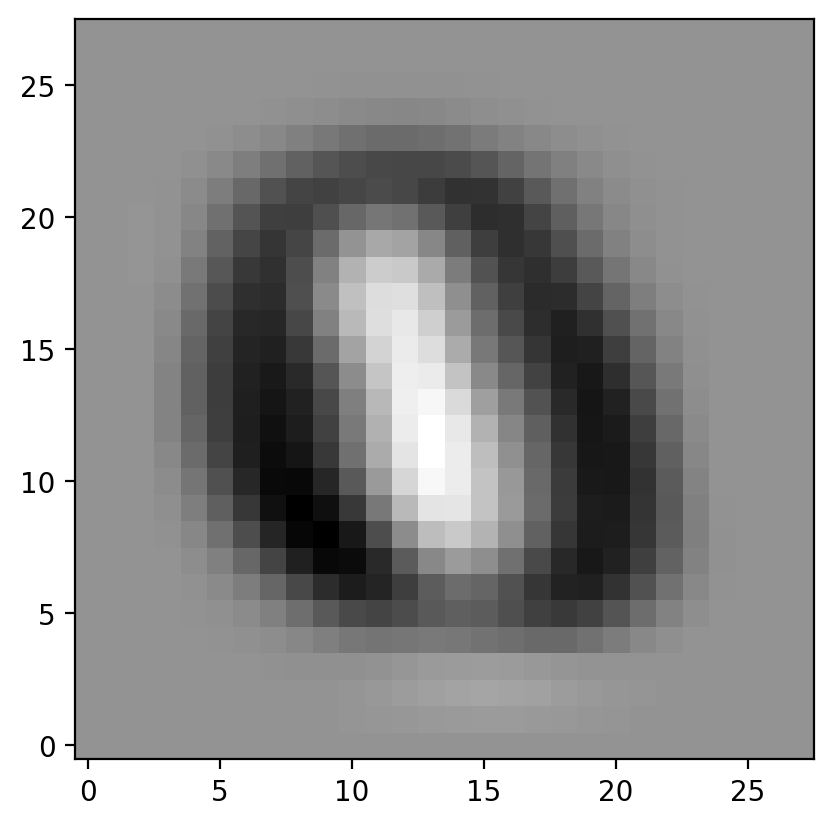

In [3]:
fig,ax=plt.subplots()
ax.imshow(np.reshape(vecs[:,0],[28,28]), origin='lower',cmap='binary',interpolation='nearest')

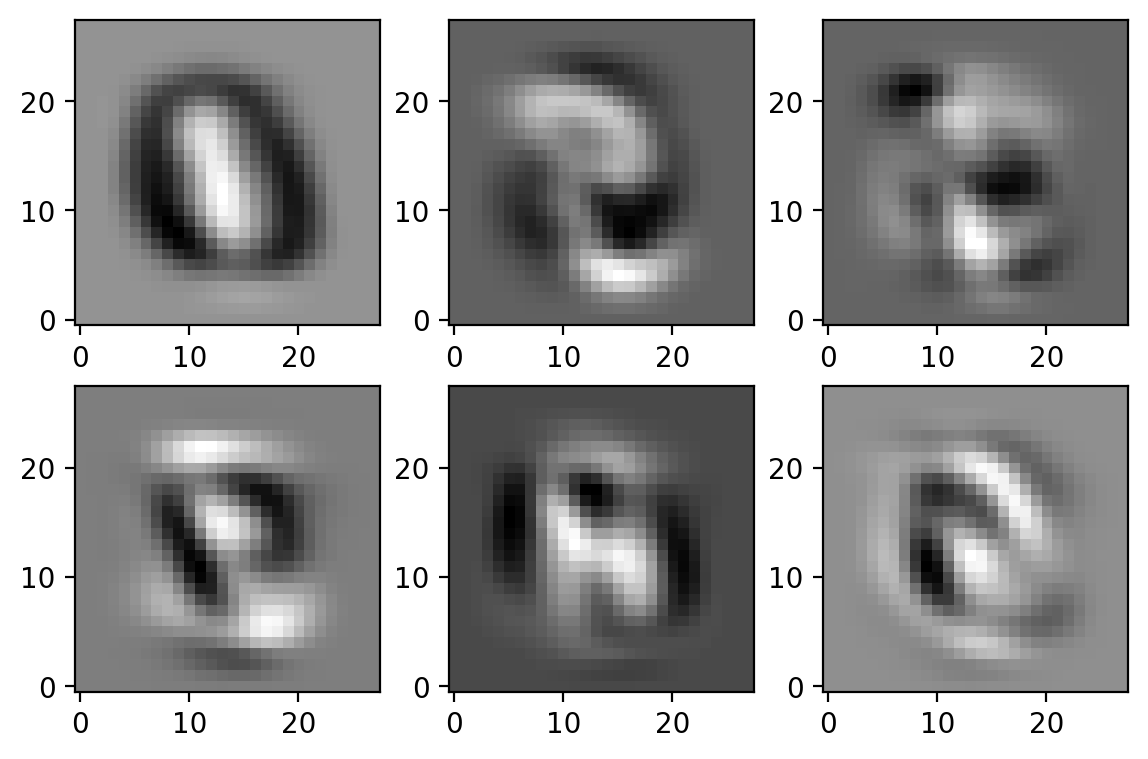

In [4]:
fig,ax=plt.subplots(2,3)
for i in range(2):
    for j in range(3):
        ax[i,j].imshow(np.reshape(vecs[:,(i+j*3)],[28,28]), origin='lower',cmap='binary',interpolation='nearest')
plt.subplots_adjust(left=0.05,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.2)  #Adjust the space between the subplots so there isn't acres of whitespace

(784,)


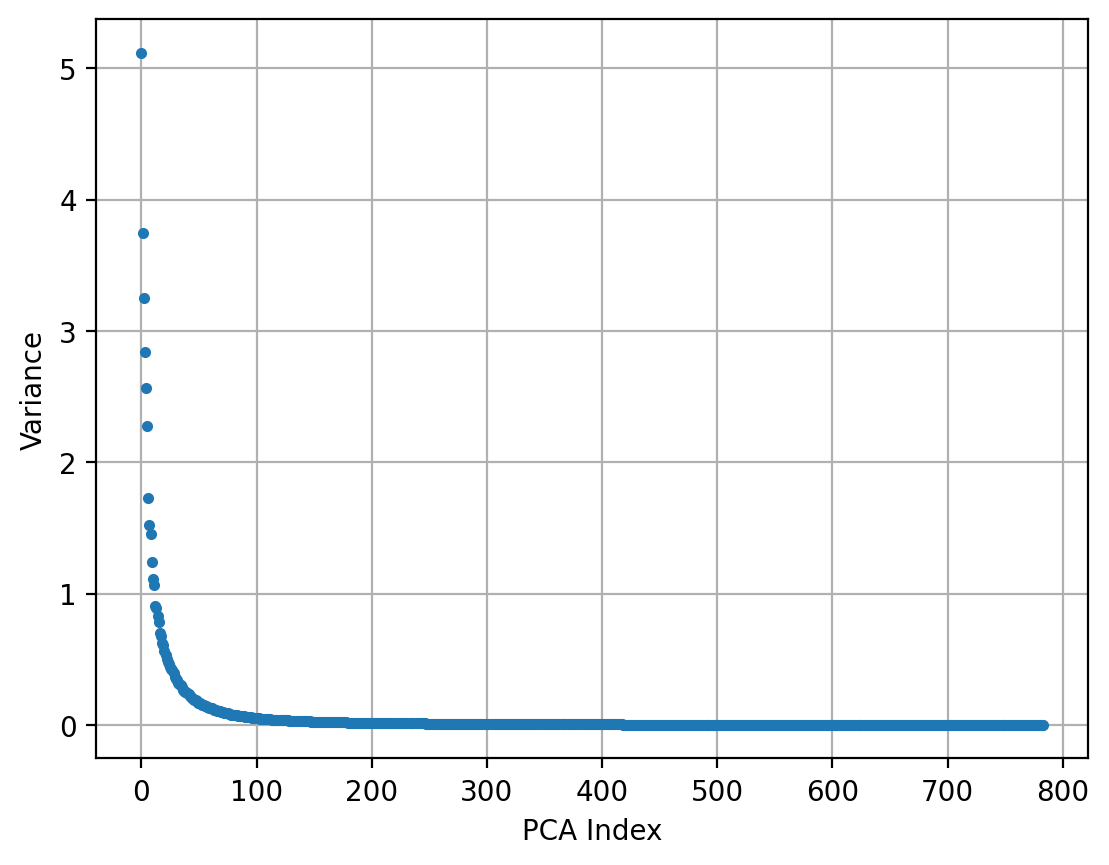

In [5]:
print(np.shape(vals))
fig,ax=plt.subplots()
index=np.arange((np.shape(vals)[0]))
ax.plot(index,vals.real,".")
ax.set_xlabel("PCA Index")
ax.set_ylabel("Variance")
ax.grid()

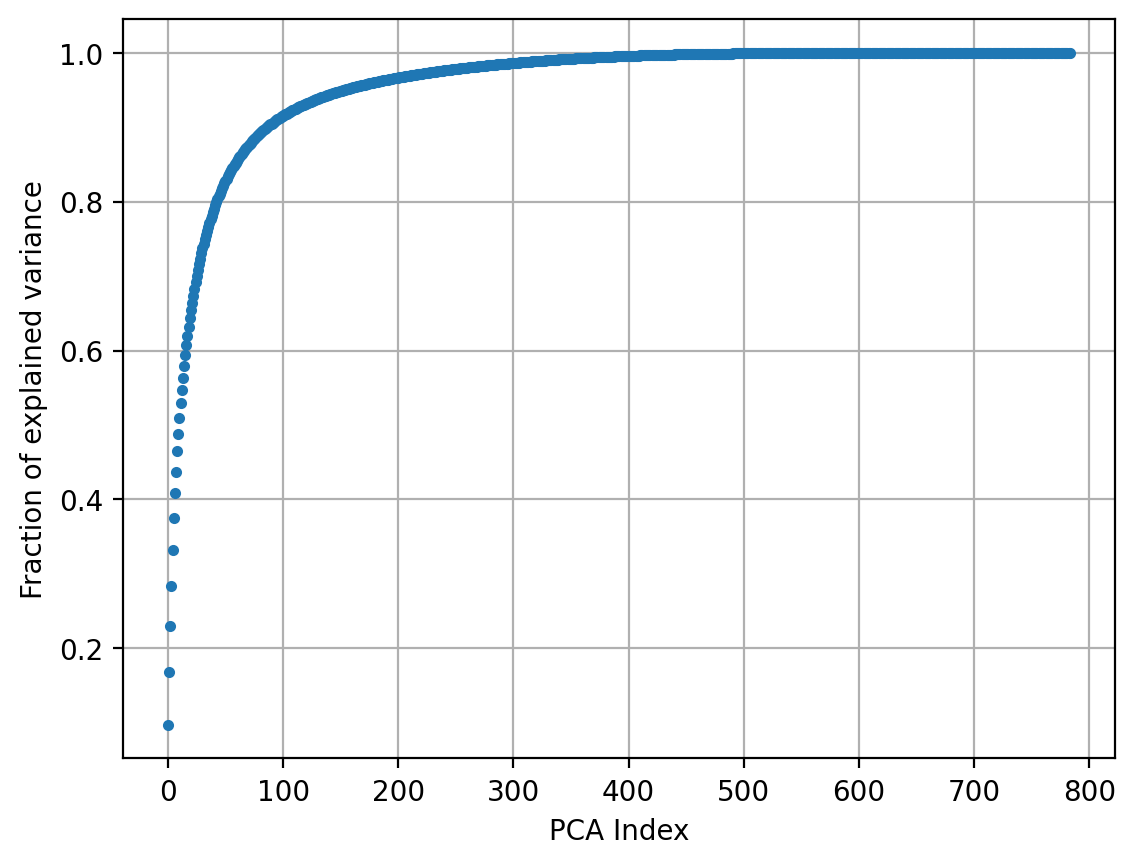

In [6]:
fig,ax=plt.subplots()
cumsum=np.cumsum(vals.real)
cdf=cumsum/cumsum[-1]
index=np.arange((np.shape(vals)[0]))
ax.plot(index,cdf,".")
ax.set_xlabel("PCA Index")
ax.set_ylabel("Fraction of explained variance")
ax.grid()

### Using the first $N$ components
Having determined all of the eigenvectors we can now try to reconstruct our image using only a subset of the eigenvectors. Essenitally we will be constructing a projection operator to do something close to
$$y = V^T V x$$
and then vary the number of eigenvectors including in the projection.

Doing this below for all 60,000 of the training images the order of the matrices in the dot products can look a little confusing.
$$ P = x v $$
$$ y = P v^T $$
and in this last line we can either compute the matrix multiplication over the full matrix (to recover x) or over the first $N$ columns of $P$ and rows of $v^T$.

In [7]:
P=np.dot(x,vecs)
print("x.shape:",x.shape)
print("P.shape:",P.shape)
newImage2=(np.dot(P[:,0:2],vecs.T[0:2,:]))+mu
newImage10=(np.dot(P[:,0:10],vecs.T[0:10,:]))+mu
newImage50=(np.dot(P[:,0:50],vecs.T[0:50,:]))+mu
newImage100=(np.dot(P[:,0:100],vecs.T[0:100,:]))+mu
newImage200=(np.dot(P[:,0:200],vecs.T[0:200,:]))+mu
newImage500=(np.dot(P[:,0:500],vecs.T[0:500,:]))+mu
newImage784=(np.dot(P[:,:],vecs.T[:,:]))+mu

x.shape: (60000, 784)
P.shape: (60000, 784)


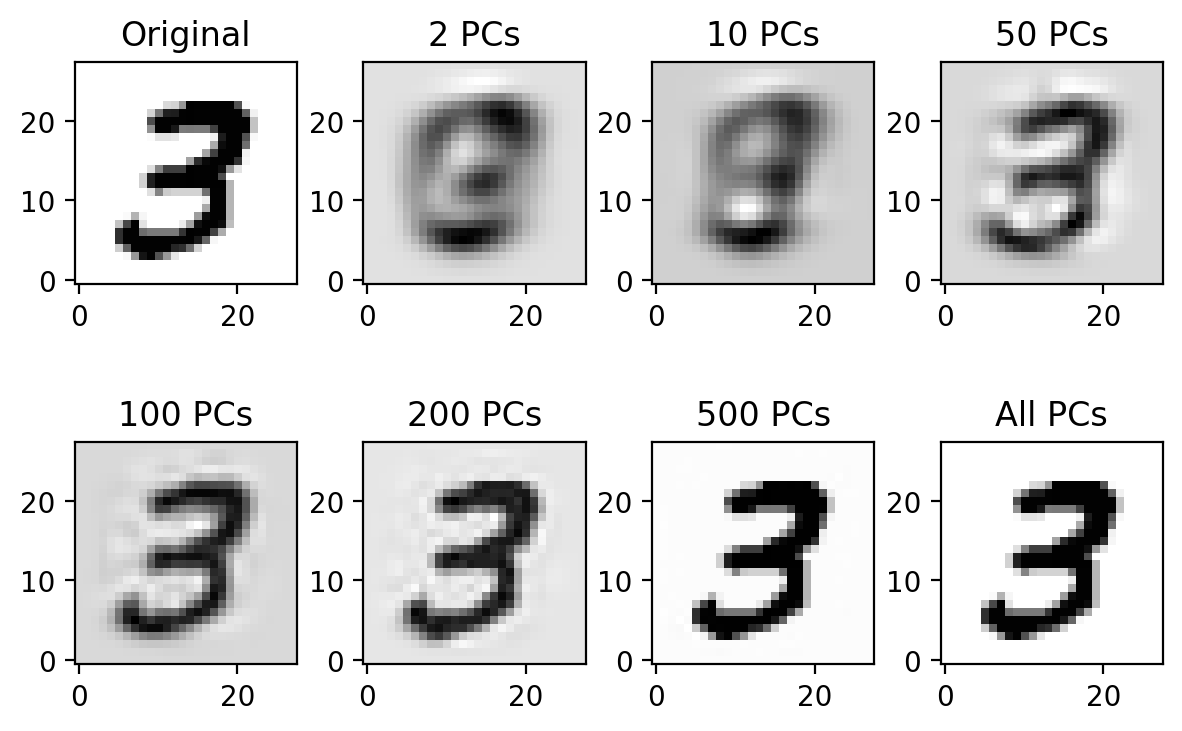

In [8]:
fig,ax=plt.subplots(2,4)
whichImage=7
ax[0,0].imshow(np.flipud(np.reshape(X[whichImage,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[0,0].set_title("Original")
ax[0,1].imshow(np.flipud(np.reshape(newImage2[whichImage,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[0,1].set_title("2 PCs")
ax[0,2].imshow(np.flipud(np.reshape(newImage10[whichImage,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[0,2].set_title("10 PCs")
ax[0,3].imshow(np.flipud(np.reshape(newImage50[whichImage,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[0,3].set_title("50 PCs")
ax[1,0].imshow(np.flipud(np.reshape(newImage100[whichImage,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[1,0].set_title("100 PCs")
ax[1,1].imshow(np.flipud(np.reshape(newImage200[whichImage,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[1,1].set_title("200 PCs")
ax[1,2].imshow(np.flipud(np.reshape(newImage500[whichImage,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[1,2].set_title("500 PCs")
ax[1,3].imshow(np.flipud(np.reshape(newImage784[whichImage,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[1,3].set_title("All PCs")
plt.subplots_adjust(left=0.05,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)  #Ad
